<a href="https://colab.research.google.com/github/Trosadventures/myfirstrepository/blob/main/Gaussianwhitenoise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np

In [9]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

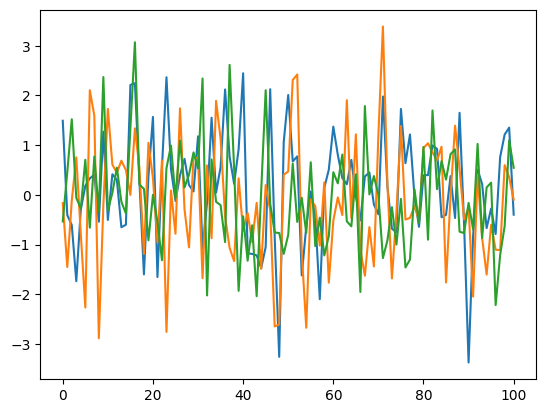

In [12]:
# 3 independent gaussian random walks
unif_1 = np.random.rand(101)
norm_1 = stats.norm.ppf(unif_1,0,1)

# 2
unif_2 = np.random.rand(101)
norm_2 = stats.norm.ppf(unif_2,0,1)

unif_3 = np.random.rand(101)
norm_3 = stats.norm.ppf(unif_3,0,1)

#3
plt.plot(norm_1)
plt.plot(norm_2)
plt.plot(norm_3)

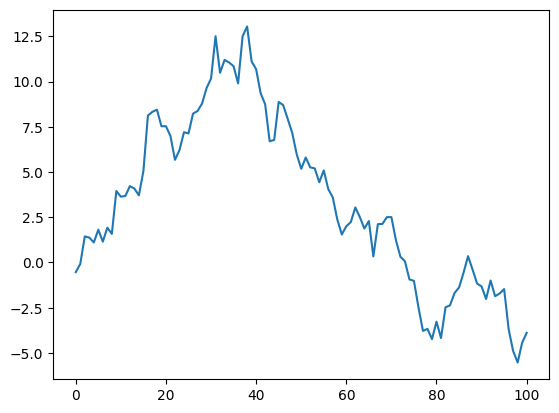

In [14]:
rand_walk = np.cumsum(norm_3)


plt.plot(rand_walk)

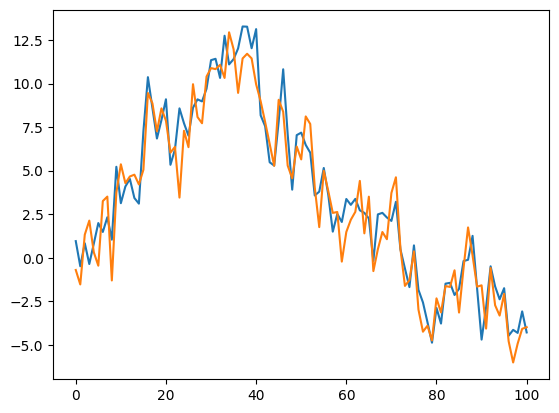

In [16]:
X_t = rand_walk + norm_1
Y_t = rand_walk + norm_2

plt.plot(X_t)
plt.plot(Y_t)

## Engle-Granger testing procedure


In [19]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm



In [20]:
adfuller(X_t)[1]


0.8429187073090243

0.84291873090243 is the P-value, Accept H0
Both have unit root, we can go to the next phase


Step 2


In [25]:
X = sm.add_constant(X_t)
X

array([[ 1.        ,  0.95491416],
       [ 1.        , -0.48887338],
       [ 1.        ,  0.83134102],
       [ 1.        , -0.36051733],
       [ 1.        ,  0.81002727],
       [ 1.        ,  1.99169834],
       [ 1.        ,  1.48129869],
       [ 1.        ,  2.32593833],
       [ 1.        ,  1.03950757],
       [ 1.        ,  5.22299777],
       [ 1.        ,  3.13136204],
       [ 1.        ,  4.09046879],
       [ 1.        ,  4.52423178],
       [ 1.        ,  3.43034466],
       [ 1.        ,  3.10670417],
       [ 1.        ,  7.26439864],
       [ 1.        , 10.36911123],
       [ 1.        ,  8.59812927],
       [ 1.        ,  6.84571702],
       [ 1.        ,  7.90487607],
       [ 1.        ,  9.09860582],
       [ 1.        ,  5.33673578],
       [ 1.        ,  6.22363801],
       [ 1.        ,  8.57817525],
       [ 1.        ,  7.72323564],
       [ 1.        ,  7.00852501],
       [ 1.        ,  8.61593879],
       [ 1.        ,  9.09545484],
       [ 1.        ,

In [30]:
engle_regression = sm.OLS(Y_t,X)

In [31]:
engle_regression = engle_regression.fit()


In [32]:
print(engle_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     1183.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           7.24e-57
Time:                        15:26:22   Log-Likelihood:                -173.59
No. Observations:                 101   AIC:                             351.2
Df Residuals:                      99   BIC:                             356.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1136      0.167     -0.679      0.4

In [36]:
engle_residuals = Y_t - engle_regression.predict(X)
engle_residuals

array([-1.49582734, -0.95455502,  0.65045193,  2.58903931, -0.3430499 ,
       -2.23645425,  1.96008697,  1.41290417, -2.1789678 , -1.10990651,
        2.50281516,  0.50791323,  0.4779842 ,  1.62138653,  1.36702987,
       -1.74198693, -0.28648762,  0.80686954,  0.85912594,  1.17394848,
       -0.67065451,  1.07240449,  0.56427132, -4.58960721,  0.05870099,
       -0.20230561,  1.88537192, -0.4555959 , -0.70052319,  1.29010561,
        0.21324283,  0.08200403,  1.36925313, -1.68508174,  2.50237447,
        1.24411475, -1.84839815, -1.07108954, -0.79164875,  0.12026619,
       -2.41014569,  1.3255106 ,  0.72096074,  1.43964799,  0.35933623,
        1.74545789, -1.79385936, -1.33222464,  0.95660334, -0.19533514,
       -1.07221002,  2.06845453,  2.0574083 ,  0.7535075 , -1.73658305,
        0.20686331,  0.50318423,  1.26441108,  0.34627725, -2.06069829,
       -1.61463728, -0.59203165, -0.46508367,  1.93777016, -0.93677101,
        1.47306633, -0.47994647, -1.7618421 , -0.8587807 , -1.01

In [37]:
adfuller(engle_residuals)[1]

7.631638245361928e-18

Reject Ho since the adfuller is too small


H0: Non-stationary H1: stationary
Residuals are stationary

Residuals are stationary, Xt, Yt are cointegrated